# Optimising maize crop yields in Sub-Saharan Africa in the context of climate change

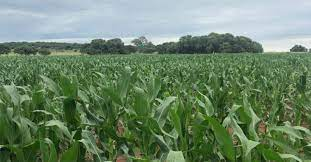

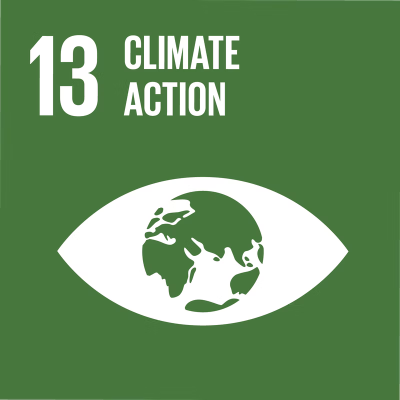

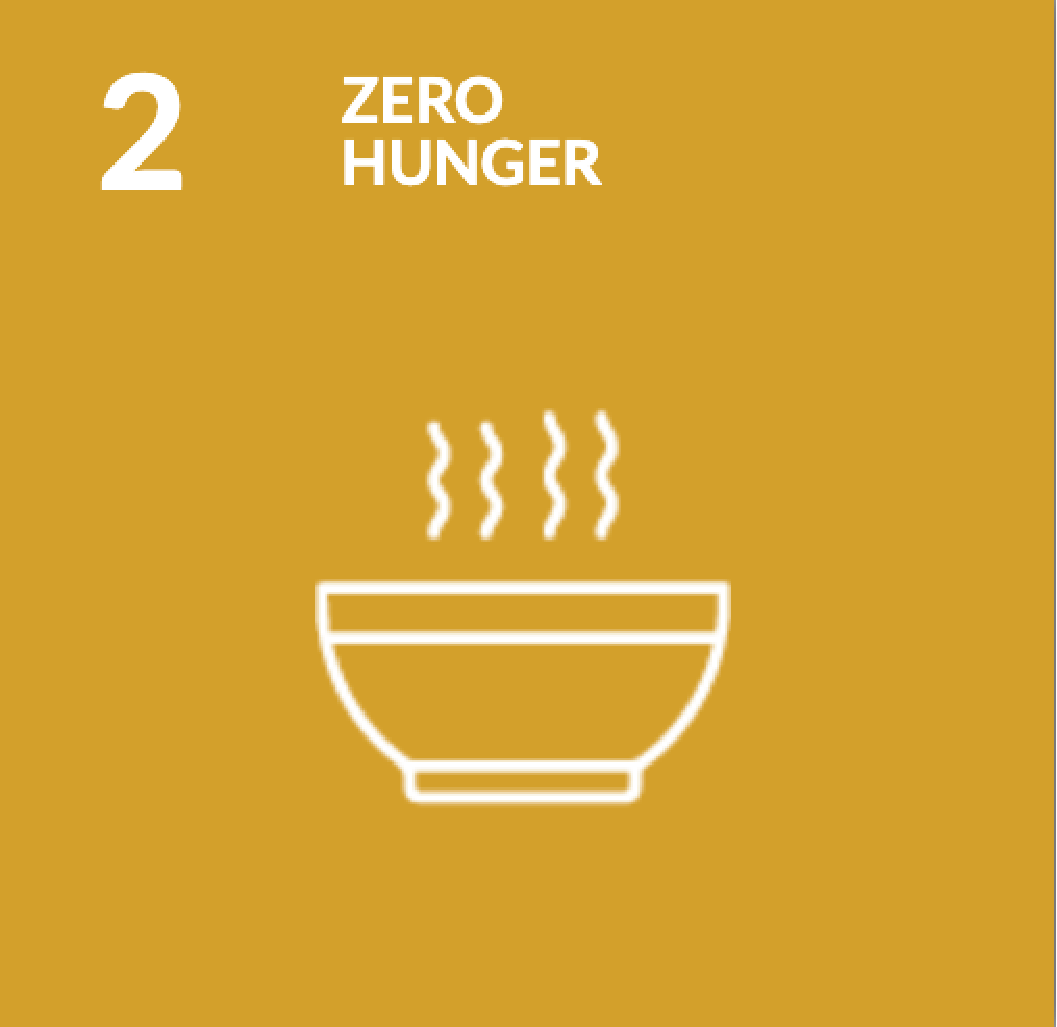

<Optimising maize crop yields in Sub-Saharan Africa in the context of climate change>

# Problem statement 

African countries have been suffering from food shortages for decades, and all stakeholders are trying to find a solution to this age-old problem. With climate change, agricultural yields are decreasing significantly. In this project we will try to answer the following question: **"How can maize yields in sub-Saharan Africa be optimised in the context of climate change?"**.This project is focus on **SDG2** and **SDG13**,it aims is to improve maize yields in the context of extreme climate change in sub-Saharan Africa. More specifically, it aims to:
- Map the climatic environment of sub-Saharan Africa;
- Describe maize crop yields by sub-region (Central, West, East Africa, etc.);
- Assess the impact of climate change on maize yields;
- Predict maize yields as a function of climatic events.

# Import the packages 

In [280]:
import warnings
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import tensorflow as tf
from plotly.offline import init_notebook_mode
plt.style.use("seaborn-dark")
init_notebook_mode (connected=True)
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
warnings.simplefilter(action="ignore", category=FutureWarning)
from keras.models import Sequential
from keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier

C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_3748\2746404944.py:22: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# Data Preparation 

### import the data 

> We create a function called **clean** to import to clean and wrangle the datasets inside it. 

In [212]:
def clean(path):
    df=pd.read_csv(path)
    #Rename the features to ease the analysis
    df=df.rename(columns={'Country Code':"iso3",
       'Agricultural land (% of land area) [AG.LND.AGRI.ZS]':"feat1",
       'Agricultural land (sq. km) [AG.LND.AGRI.K2]':"feat2",
       'Arable land (% of land area) [AG.LND.ARBL.ZS]':"feat3",
       'Arable land (hectares per person) [AG.LND.ARBL.HA.PC]':"feat4",
       'Population growth (annual %) [SP.POP.GROW]':"feat5",
       'Population ages 15-64, male (% of male population) [SP.POP.1564.MA.ZS]':"feat6",
       'Population ages 15-64, female (% of female population) [SP.POP.1564.FE.ZS]':"feat7",
       'Population ages 15-64 (% of total population) [SP.POP.1564.TO.ZS]':"feat8",
       'Urban population (% of total population) [SP.URB.TOTL.IN.ZS]':"feat9",
       'Employment in agriculture (% of total employment) (modeled ILO estimate) [SL.AGR.EMPL.ZS]':"feat10",
       'Employment in agriculture, female (% of female employment) (modeled ILO estimate) [SL.AGR.EMPL.FE.ZS]':"feat11"})
    # Drop columns with missing value greater than 50%
    for column in df.columns:
        if df[column].isnull().sum()>len(df)/2:
            df.drop(columns=[column],inplace=True)
    #delate features will not be included in our model
    df.drop(columns=["Time","Country Name"],inplace=True)
    #Replace NA values by the mean
    df=df.fillna(df.mean())
    #subset and remove outliers from maize yield feature
    q1,q9=df['maize'].quantile([0.1,0.9])
    mask_maize=df['maize'].between(q1,q9)
    df=df[mask_maize]
    #Index countrycode
    #df=df.set_index('iso3')
    return df

In [213]:
# Use the function to import the cleaning datasets
df=clean('Data3.csv')

### Explore

In [214]:
df.head()

,iso3,maize,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11
0,AGO,10836.0,36.814791,458970.0,4.309778,0.155722,3.166030,51.794773,52.648165,52.226425,67.460,58.65716,65.73271
1,BEN,12064.0,35.030153,39500.0,24.831501,0.215436,2.759705,54.189234,54.502531,54.345611,48.972,28.14955,13.07583
2,BWA,7980.0,45.633723,258620.0,0.458772,0.100447,1.636743,63.295558,63.684988,63.492752,71.560,23.07407,16.44704
3,BFA,17238.0,46.564327,127400.0,22.295322,0.276010,2.650376,52.990508,53.730505,53.361834,31.240,73.26725,76.05038
4,BDI,15556.0,81.892523,21030.0,49.454829,0.101185,2.672478,50.990671,51.466715,51.230355,14.058,85.85030,93.65079


In [215]:
print("The shape of data is :",df.shape)
df.info()

The shape of data is : (39, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 48
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    39 non-null     object 
 1   maize   39 non-null     float64
 2   feat1   39 non-null     float64
 3   feat2   39 non-null     float64
 4   feat3   39 non-null     float64
 5   feat4   39 non-null     float64
 6   feat5   39 non-null     float64
 7   feat6   39 non-null     float64
 8   feat7   39 non-null     float64
 9   feat8   39 non-null     float64
 10  feat9   39 non-null     float64
 11  feat10  39 non-null     float64
 12  feat11  39 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.3+ KB


In [216]:
sorted(df.columns)

['feat1',
 'feat10',
 'feat11',
 'feat2',
 'feat3',
 'feat4',
 'feat5',
 'feat6',
 'feat7',
 'feat8',
 'feat9',
 'iso3',
 'maize']

The target value is numeric and all explanatory variables are also numerci.

In [217]:
print(df.isna().sum())

iso3      0
maize     0
feat1     0
feat2     0
feat3     0
feat4     0
feat5     0
feat6     0
feat7     0
feat8     0
feat9     0
feat10    0
feat11    0
dtype: int64


In [218]:
print("The shape of data is:",df.shape)

The shape of data is: (39, 13)


In [219]:
print("Dunplicated:",df.duplicated().sum())

Dunplicated: 0


#### Cheick the cordinality

In [220]:
df.select_dtypes('object').nunique()

iso3    39
dtype: int64

In [221]:
df.select_dtypes('object').nunique()

iso3    39
dtype: int64

#### Explanatory analysis

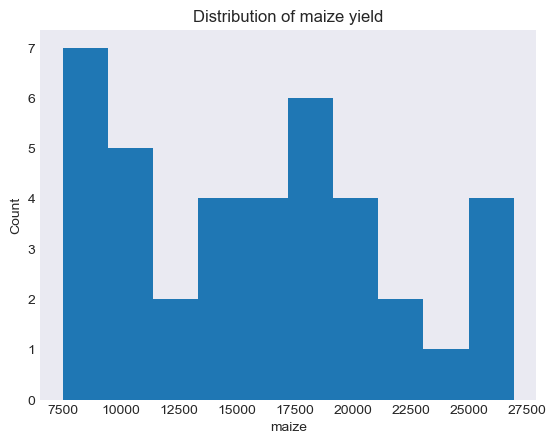

In [222]:
plt.hist(df["maize"])
plt.xlabel("maize")
plt.ylabel("Count")
plt.title("Distribution of maize yield");

C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_3748\4057131190.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




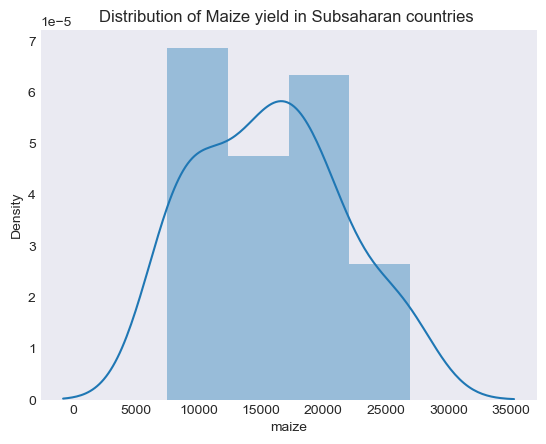

In [223]:
# Data distribution
plt.title('Distribution of Maize yield in Subsaharan countries ')
sns.distplot(df['maize'])
plt.show();

- The distribution is not far from the normality

In [224]:
#Calculate the mean of maize by country
mean_maize_by_state=df.groupby('iso3')['maize'].mean().sort_values(ascending=True)

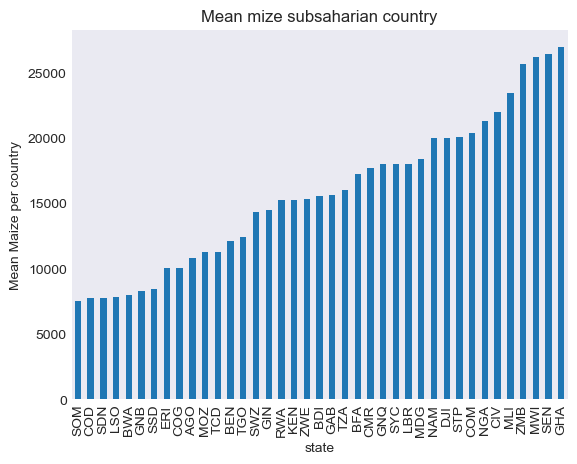

In [225]:
#Create a bar plot to show the mean of maize yield by subsabaran countries
mean_maize_by_state.plot(
       kind="bar",
       xlabel="state",
       ylabel="Mean Maize per country",
       title="Mean mize subsaharian country"
);

> The plot clearly states that Ghana has the highest mean of maize yiled than any subsaharan country.Somali reprente small maize yield which is explain by secheresse.

In [226]:
#Create a plot to show the total of maize yield by subsabaran countries
country_maize_yield = df.groupby('iso3').sum()[['maize']].sort_values('maize', ascending = False).reset_index().head(10)
fig=px.scatter(country_maize_yield,
               x ='iso3', y = 'maize',
               template = 'plotly_dark', color = 'iso3', 
               size = 'maize' , opacity = 0.85,
               title="<b>Total maize yield in 10 Subsaharian countries networth ")
fig.show()

> The graph shows clearly the darker of country is the greater maize yield in subsaharian countries.It informs that **Ghana**,**Senegal** ,**Malawi** and **Zambia** are the top 3 African subsaharan countries wich have greater maize yiled in 2020.

In [227]:
def build_nat_choropleth():
    fig = px.choropleth(
        data_frame=df,
        locations="iso3",
        color="maize",
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Oranges,
        title="Maize yield in Subsaharan Africa"
        
    )
    return fig
nat_fig = build_nat_choropleth()
print("nat_fig type:", type(nat_fig))
nat_fig.show();

nat_fig type: <class 'plotly.graph_objs._figure.Figure'>


> The map shows clearly the darker of country is the greater maize yield in subsaharian countries.It informs that **Ghana**,**Senegal** ,**Malawi** and **Zambia** are the top 3 African subsaharan countries wich have greater maize yiled in 2020.

In [229]:
#describe Maize
df['maize'].describe().apply("{0:.0f}".format)

count       39
mean     15758
std       5774
min       7500
25%      11033
50%      15556
75%      19972
max      26923
Name: maize, dtype: object

> The subsaharan countries have 15758 average 100g/ha of maize yiled.Less than 25 % african countries have 11033 100g/ha maize yield.Greater than 75 % have 19972  100g/ha maize yield.The avrage and median values are close ,so the maize yield is normaly distributed.

In [230]:
#Statistics descriptive of all the variables
df.describe()

,maize,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11
count,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,15757.606466,48.604741,2.078596e+05,13.848131,0.170668,2.293577,56.078135,56.297899,56.200182,45.495205,45.647855,46.812769
std,5773.633633,21.967386,2.362713e+05,14.822557,0.100300,0.620121,4.454191,3.767497,4.074795,18.329507,19.550955,23.432144
min,7500.000000,3.369565,1.550000e+01,0.129422,0.001511,0.805183,49.866459,50.019870,50.151164,14.058000,1.184986,0.917983
25%,11033.000000,35.188963,2.128118e+04,4.187844,0.100816,1.975253,53.347136,54.052583,53.730012,31.771500,30.432495,27.231400
50%,15556.000000,47.142562,1.260374e+05,10.190814,0.155722,2.378495,55.371702,55.843096,55.743353,44.677000,44.984287,47.604410
75%,19972.500000,69.855121,3.635500e+05,17.568143,0.224869,2.686762,58.082974,58.027463,58.026360,55.488500,61.764265,65.961655
max,26923.000000,81.892523,1.126648e+06,51.414674,0.459836,3.222528,71.149733,66.512145,68.955720,90.423000,85.850300,93.650790


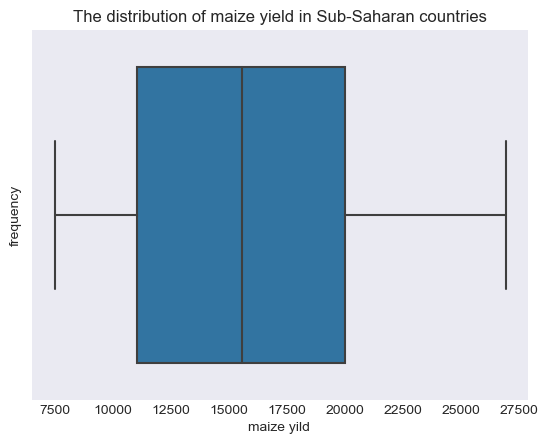

In [231]:
#sns.boxplot(x=df[features])
   # plt.title(feature);
sns.boxplot(x=df['maize'])
plt.xlabel("maize yild ")
plt.ylabel("frequency")
plt.title("The distribution of maize yield in Sub-Saharan countries");

- Maize yield does not have outliers 

### Cheick multicolinearity

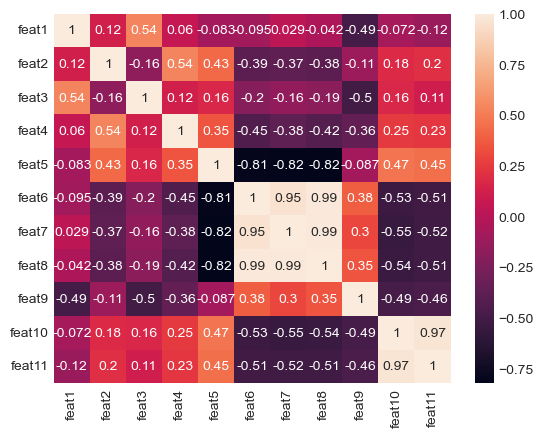

In [232]:
# Show the correlation of explonatory variables
corr=df.select_dtypes("number").drop(columns="maize").corr()
sns.heatmap(corr,annot=True);

> The heatmapcshow clearly multicolinearity of explanatory variables.

In [233]:
## We show the correlation of target variable and each explanatory variable
corr2=df.select_dtypes("number").corr()
round(corr2,3)

,maize,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11
maize,1.000,0.034,-0.204,0.224,-0.071,0.013,0.107,0.096,0.104,0.106,-0.040,-0.104
feat1,0.034,1.000,0.116,0.536,0.060,-0.083,-0.095,0.029,-0.042,-0.494,-0.072,-0.121
feat2,-0.204,0.116,1.000,-0.163,0.537,0.427,-0.385,-0.370,-0.383,-0.112,0.177,0.202
feat3,0.224,0.536,-0.163,1.000,0.117,0.161,-0.205,-0.159,-0.186,-0.503,0.160,0.111
feat4,-0.071,0.060,0.537,0.117,1.000,0.345,-0.446,-0.380,-0.421,-0.359,0.250,0.235
feat5,0.013,-0.083,0.427,0.161,0.345,1.000,-0.806,-0.824,-0.824,-0.087,0.472,0.447
feat6,0.107,-0.095,-0.385,-0.205,-0.446,-0.806,1.000,0.954,0.991,0.381,-0.527,-0.506
feat7,0.096,0.029,-0.370,-0.159,-0.380,-0.824,0.954,1.000,0.986,0.300,-0.548,-0.517
feat8,0.104,-0.042,-0.383,-0.186,-0.421,-0.824,0.991,0.986,1.000,0.349,-0.540,-0.514
feat9,0.106,-0.494,-0.112,-0.503,-0.359,-0.087,0.381,0.300,0.349,1.000,-0.488,-0.463


Important correlations with the target variable:
- maize and feat2 (-0.204)
- maize and feat3 (0.204)
> Highly correlated explanatory's feature:
- feat1 and feat3 (0.536)
- feat2 and feat4 (0.537)
- feat3 and feat9 (0.503)
- feat5,feat7,feat7 and feat8 (-0.806,-0.824,-0.824) 
- feat6 ,feat5 and feat7,feat8 (-806,0.954,0.991)
> We ramark that most explanatory features are highly correlated each other,so we will include in our model only features which have upt to **10%** or **-10%** correlation propotion values.
So we will delate **(feat1,feat4,feat5,feat7,feat10)**

In [234]:
# Our final DataFrame to modeling
df.drop(columns=['feat1','feat4','feat5','feat7','feat10'],inplace=True)

In [235]:
df.head()

,iso3,maize,feat2,feat3,feat6,feat8,feat9,feat11
0,AGO,10836.0,458970.0,4.309778,51.794773,52.226425,67.460,65.73271
1,BEN,12064.0,39500.0,24.831501,54.189234,54.345611,48.972,13.07583
2,BWA,7980.0,258620.0,0.458772,63.295558,63.492752,71.560,16.44704
3,BFA,17238.0,127400.0,22.295322,52.990508,53.361834,31.240,76.05038
4,BDI,15556.0,21030.0,49.454829,50.990671,51.230355,14.058,93.65079


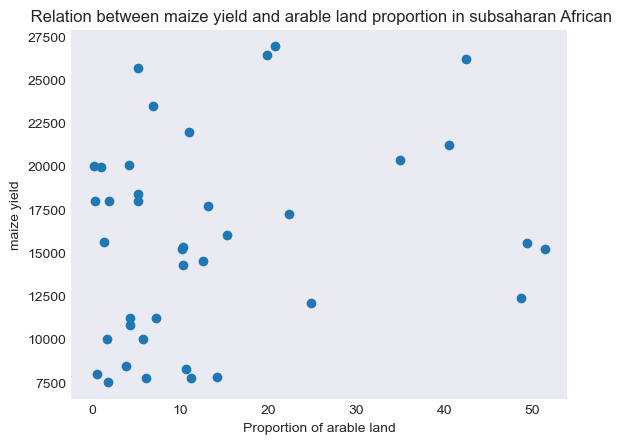

In [236]:
# relation between target variabe and proportion of arable land
plt.scatter(x=df['feat3'],y=df['maize'])
plt.xlabel('Proportion of arable land')
plt.ylabel('maize yield')
plt.title(' Relation between maize yield and arable land proportion in subsaharan African');

> The graph shows a positif linear correlation between maize yield and proportion of arable land.The greater the proportion of arable land in a country, the greater the yield from maize.

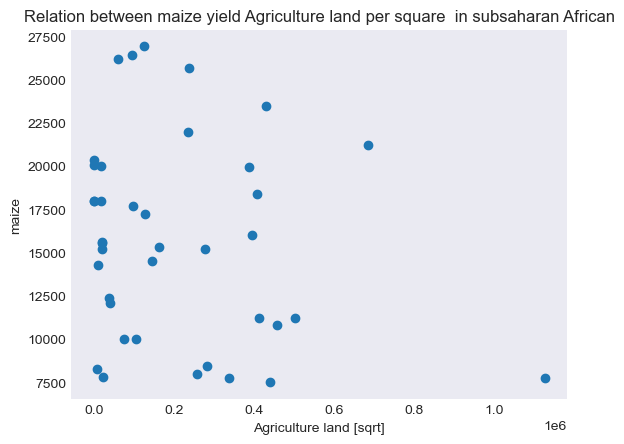

In [237]:
# relation between target variabe and Agriculture land per square
plt.scatter(x=df['feat2'],y=df['maize'])
plt.xlabel('Agriculture land [sqrt]')
plt.ylabel('maize')
plt.title('Relation between maize yield Agriculture land per square  in subsaharan African');

> The graph shows a negative linear correlation between maize yield and agriculture land per square.The lesser the arable land per square in a country, the lesser the yield from maize.

In [58]:
#sns.pairplot(df[['maize','feat1','feat2','feat3','feat4','feat5','feat6','feat7','feat8','feat9','feat10','feat11']],diag_kind = 'kde');

In [238]:
df2=df.copy()

In [239]:
df2=df2.set_index('iso3')

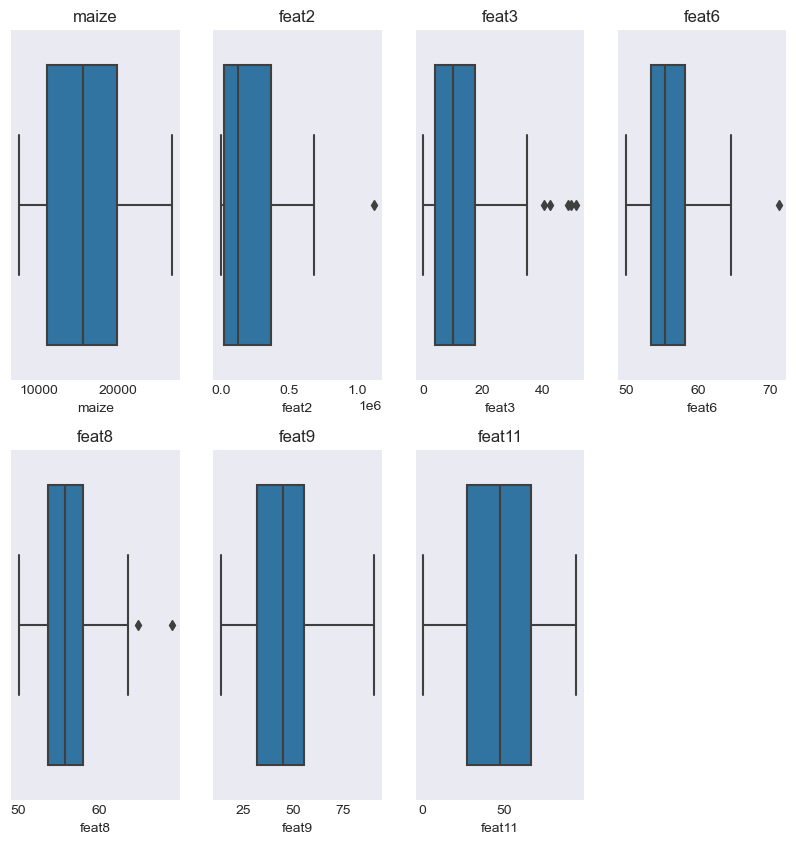

In [240]:
#Cheick the multicolinearity
plt.figure(figsize=(10,10))
for i,feature in enumerate(df2):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=df2[feature])
    plt.title(feature);

> The boxplots show outliers on **[feat2,feat3,feat6,feat8]** .

C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_3748\3055375506.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_3748\3055375506.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Yssoufa Thabiti\AppData\Local\Temp\ipykernel_3748\3055375506.py:4: Us

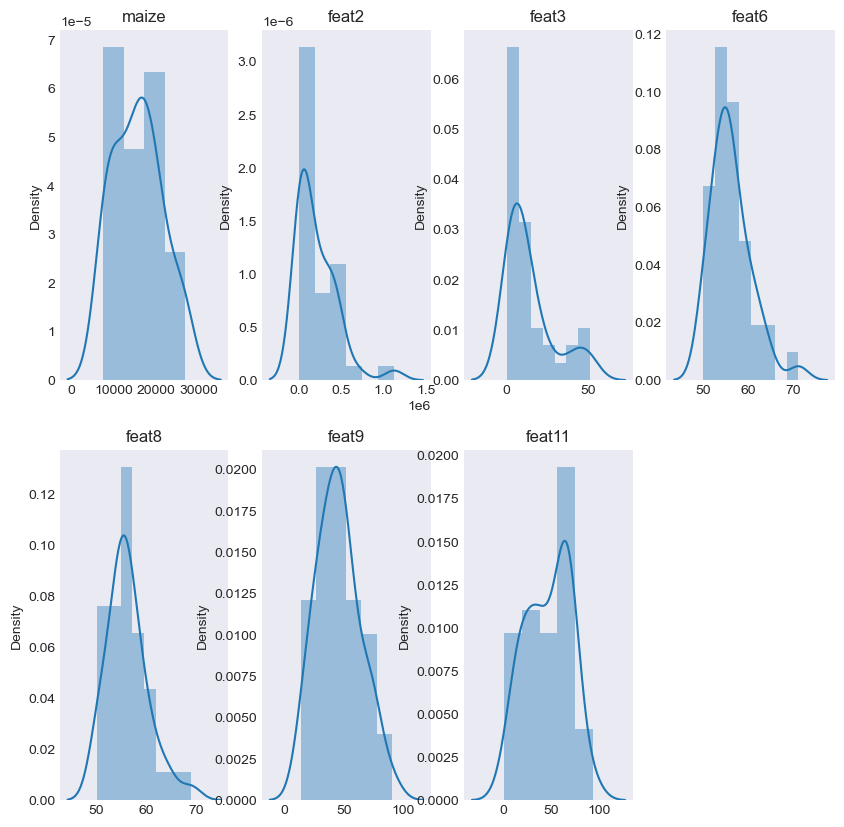

In [241]:
plt.figure(figsize=(10,10))
for i,feature in enumerate(df2):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df2[feature])
    plt.title(feature);

> The density plots show that most of explanatory variables are not normaly distributed.

#### Future scaling

> Create your feature matrix X_train and target vector y_train. Your target is **"maize"**. Your features should be all the columns that remain in the DataFrame you cleaned above.

In [242]:
scaler=StandardScaler()
df[[ 'maize', 'feat2', 'feat3', 'feat6', 'feat8', 'feat9', 'feat11']]=scaler.fit_transform(
    df[[ 'maize', 'feat2', 'feat3', 'feat6', 'feat8', 'feat9', 'feat11']])

In [243]:
# transform categorial variables into numerical variables by using get_dumnies functions
df=pd.get_dummies(df)

# LINEAR REGRESSION MODEL

## Split data

In [294]:
X=df.drop(columns=('maize'))
y=df['maize']

> Split X and y into training and test sets. The first **80%** of the data should be in your training set. The remaining **20%** should be in the test set

In [246]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [247]:
print("The shape of x_train is:",x_train.shape)

The shape of x_train is: (31, 45)


In [248]:
print("The shape of y_test is:",x_test.shape)

The shape of y_test is: (8, 45)


## Build te model

### Baseline

In [249]:
y_mean=y_train.mean()
y_pred_baseline=[y_mean]*len(y_train)
print("Mean maize yield:",round(y_mean,2))

print("Baseline MAE:", round(mean_absolute_error(y_train,y_pred_baseline),2))

Mean maize yield: 0.14
Baseline MAE: 0.84


In [250]:
lr=LinearRegression()
lr_model=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [203]:
#lr.coef_

In [251]:
r2_score(y_test, y_pred)

-4.352027529314004

In [252]:
pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual Values','Predicted Values'])

,Actual Values,Predicted Values
0,-0.591425,1.747700
1,-1.315570,0.356690
2,-0.035375,1.914917
3,-1.010260,0.140717
4,-1.282758,-0.422117
5,-0.095033,2.011107
6,-0.793385,-0.711973
7,0.755798,0.020029


# Evaluate

 - Calculate the training mean absolute error for your predictions as compared to the true targets in y_train.

In [253]:
print("Training MAE:", mean_absolute_error(y_test,y_pred))

Training MAE: 1.3620768996474473


In [254]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 2.3901070125844366


In [255]:
print("RMSE:",np.sqrt(mean_absolute_error(y_test,y_pred)))

RMSE: 1.1670805026421474


In [256]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.5459970933298797

## communicate Results

# Neural network model 

In [267]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = [x_train.shape[1]]),
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1)
    ])

In [268]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics = ['mae','mse'])

In [269]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                2944      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [270]:
history = model.fit(x_train, y_train, epochs = 50,batch_size=30, validation_data=(x_test, y_test))

Epoch 1/50
2/2 [==============================] - 1s 155ms/step - loss: 1.0793 - mae: 0.8276 - mse: 1.0793 - val_loss: 1.0725 - val_mae: 0.9887 - val_mse: 1.0725
Epoch 2/50
2/2 [==============================] - 0s 32ms/step - loss: 0.9439 - mae: 0.7684 - mse: 0.9439 - val_loss: 1.0004 - val_mae: 0.9631 - val_mse: 1.0004
Epoch 3/50
2/2 [==============================] - 0s 31ms/step - loss: 0.8493 - mae: 0.7436 - mse: 0.8493 - val_loss: 1.0369 - val_mae: 0.9862 - val_mse: 1.0369
Epoch 4/50
2/2 [==============================] - 0s 31ms/step - loss: 0.8082 - mae: 0.7236 - mse: 0.8082 - val_loss: 1.1613 - val_mae: 1.0440 - val_mse: 1.1613
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.7788 - mae: 0.7085 - mse: 0.7788 - val_loss: 1.1104 - val_mae: 1.0200 - val_mse: 1.1104
Epoch 6/50
2/2 [==============================] - 0s 30ms/step - loss: 0.7299 - mae: 0.6849 - mse: 0.7299 - val_loss: 1.1024 - val_mae: 1.0196 - val_mse: 1.1024
Epoch 7/50
2/2 [=================

In [271]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
45,0.272283,0.365355,0.272283,1.838240,1.229398,1.838240
46,0.269226,0.352966,0.269226,1.913703,1.255536,1.913703
47,0.256740,0.345310,0.256740,1.940679,1.270030,1.940679
48,0.249530,0.341661,0.249530,1.900923,1.242988,1.900923
49,0.250462,0.330078,0.250462,2.060027,1.290163,2.060027


In [272]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 50ms/step


In [279]:
pd.DataFrame(list(zip(y_test,y_pred)), columns = ['Actual Values', 'Predicted Values'])


,Actual Values,Predicted Values
0,-0.591425,[1.295259]
1,-1.315570,[0.046674397]
2,-0.035375,[2.0306115]
3,-1.010260,[-0.030307462]
4,-1.282758,[-0.0810136]
5,-0.095033,[1.8991902]
6,-0.793385,[-0.5657152]
7,0.755798,[0.15299512]


In [274]:
r2_score(y_test, y_pred)

-3.61289768163458

In [275]:
loss, mae, mse = model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 23ms/step - loss: 2.0600 - mae: 1.2902 - mse: 2.0600
